In [52]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3367ca50-50eb-404c-86b6-ae09b32e46d3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

{'status': {'timestamp': '2023-05-12T18:53:33.308Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9647}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10208, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [53]:
type(data)

dict

In [54]:
import pandas as pd 

#pd.set_option('display.max_columns',None)

In [55]:
df = pd.json_normalize(data['data'])

#adding new datetime column 

df['timestamp'] = pd.to_datetime('now',utc = True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19371375.00000,19371375.00000,False,NaN,1,NaN,NaN,None,2023-05-12T18:52:00.000Z,26334.80870,16846998405.66206,-6.65500,0.04257,-2.36650,-10.31565,-11.91654,8.42221,21.54951,510141454828.47974,46.17880,553030982643.09998,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00
1,1027,Ethereum,ETH,ethereum,6866,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122802175.98188,122802175.98188,True,NaN,2,NaN,NaN,None,2023-05-12T18:52:00.000Z,1771.52759,7867940367.92596,-13.32110,-0.09140,-1.00926,-10.28034,-6.86776,5.55123,16.95006,217547443255.56607,19.69270,217547443255.57001,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00
2,825,Tether,USDT,tether,53290,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82726510004.16016,86090638895.15488,True,NaN,3,NaN,NaN,None,2023-05-12T18:52:00.000Z,1.00058,25508297876.89556,-8.59030,0.03270,-0.01020,-0.01392,-0.01181,-0.27067,0.04494,82774507874.69035,7.49480,86140588631.21001,None,2023-05-12T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-12 18:53:47.129025+00:00
3,1839,BNB,BNB,bnb,1355,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155860209.48856,155860209.48856,False,NaN,4,NaN,NaN,None,2023-05-12T18:52:00.000Z,305.73039,471742236.93249,-5.73060,0.07560,-0.09594,-6.65955,-4.16356,-1.00050,-0.64435,47651202762.51097,4.31460,47651202762.51000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00
4,3408,USD Coin,USDC,usd-coin,12378,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29957952806.54203,29957952806.54203,False,NaN,5,NaN,NaN,None,2023-05-12T18:52:00.000Z,1.00025,3792137797.23813,-8.94590,0.02745,0.02590,0.03740,0.04318,0.12998,0.01671,29965499391.18951,2.71320,29965499391.19000,None,2023-05-12T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-12 18:53:47.129025+00:00
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.42311,1099076078.76854,17.28480,-0.09372,1.75772,-9.16611,-15.93985,13.11868,11.05069,21933194767.46313,1.98590,42311182364.13000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00
6,2010,Cardano,ADA,cardano,783,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34841766154.41300,35777697010.94400,False,NaN,7,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.36024,231257314.94129,-15.05570,0.29741,1.75186,-8.26618,-10.79765,4.59541,-0.33469,12551486598.79832,1.13650,16210914637.41000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00
7,74,Dogecoin,DOGE,dogecoin,704,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139318086383.70526,139318086383.70526,True,NaN,8,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.07129,345213833.08846,8.89630,-0.18775,1.49877,-9.90672,-13.61001,-2.41640,-12.50680,9931935028.91948,0.89890,993

In [56]:
 def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    
#creation of csv file

    if not os.path.isfile(r'C:\Users\owner\Crytpo_API_csv\API.csv'):
        df.to_csv(r'C:\Users\owner\Crytpo_API_csv\API.csv',header = 'column_names')
    else:
        df.to_csv(r'C:\Users\owner\Crytpo_API_csv\API.csv',mode = 'a', header = False)

        
        

In [57]:
import os 
from time import time
from time import sleep 

for i in range(333):
    api_runner()
    print('API Runner is completed')
    sleep(30) # 30 seconds
exit()
    

C:\Users\owner\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\owner\AppData\Local\Temp\ipykernel_20384\3913561189.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner is completed


C:\Users\owner\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\owner\AppData\Local\Temp\ipykernel_20384\3913561189.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner is completed


C:\Users\owner\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\owner\AppData\Local\Temp\ipykernel_20384\3913561189.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner is completed


KeyboardInterrupt: 

In [58]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19371375.00000,19371375.00000,False,NaN,1,NaN,NaN,None,2023-05-12T18:52:00.000Z,26334.80870,16846998405.66206,-6.65500,0.04257,-2.36650,-10.31565,-11.91654,8.42221,21.54951,510141454828.47974,46.17880,553030982643.09998,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
1,1027,Ethereum,ETH,ethereum,6866,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122802175.98188,122802175.98188,True,NaN,2,NaN,NaN,None,2023-05-12T18:52:00.000Z,1771.52759,7867940367.92596,-13.32110,-0.09140,-1.00926,-10.28034,-6.86776,5.55123,16.95006,217547443255.56607,19.69270,217547443255.57001,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
2,825,Tether,USDT,tether,53290,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82726510004.16016,86090638895.15488,True,NaN,3,NaN,NaN,None,2023-05-12T18:52:00.000Z,1.00058,25508297876.89556,-8.59030,0.03270,-0.01020,-0.01392,-0.01181,-0.27067,0.04494,82774507874.69035,7.49480,86140588631.21001,None,2023-05-12T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-12 18:53:47.129025+00:00,NaT
3,1839,BNB,BNB,bnb,1355,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155860209.48856,155860209.48856,False,NaN,4,NaN,NaN,None,2023-05-12T18:52:00.000Z,305.73039,471742236.93249,-5.73060,0.07560,-0.09594,-6.65955,-4.16356,-1.00050,-0.64435,47651202762.51097,4.31460,47651202762.51000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
4,3408,USD Coin,USDC,usd-coin,12378,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29957952806.54203,29957952806.54203,False,NaN,5,NaN,NaN,None,2023-05-12T18:52:00.000Z,1.00025,3792137797.23813,-8.94590,0.02745,0.02590,0.03740,0.04318,0.12998,0.01671,29965499391.18951,2.71320,29965499391.19000,None,2023-05-12T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-12 18:53:47.129025+00:00,NaT
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.42311,1099076078.76854,17.28480,-0.09372,1.75772,-9.16611,-15.93985,13.11868,11.05069,21933194767.46313,1.98590,42311182364.13000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
6,2010,Cardano,ADA,cardano,783,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34841766154.41300,35777697010.94400,False,NaN,7,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.36024,231257314.94129,-15.05570,0.29741,1.75186,-8.26618,-10.79765,4.59541,-0.33469,12551486598.79832,1.13650,16210914637.41000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
7,74,Dogecoin,DOGE,dogecoin,704,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139318086383.70526,139318086383.70526,True,NaN,8,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.07129,345213833.08846,8.89630,-0.18775,1.49877,-9.90672,-13.61001,-2.41640,

# Understanding of the data we retrieved

In [59]:
df.shape

(60, 38)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 14
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   id                                  60 non-null     int64              
 1   name                                60 non-null     object             
 2   symbol                              60 non-null     object             
 3   slug                                60 non-null     object             
 4   num_market_pairs                    60 non-null     int64              
 5   date_added                          60 non-null     object             
 6   tags                                60 non-null     object             
 7   max_supply                          20 non-null     float64            
 8   circulating_supply                  60 non-null     float64            
 9   total_supply                        60 non-nu

# Transformation of Data

In [61]:
df[['name','max_supply','circulating_supply']]

,name,max_supply,circulating_supply
0,Bitcoin,21000000.00000,19371375.00000
1,Ethereum,NaN,122802175.98188
2,Tether,NaN,82726510004.16016
3,BNB,NaN,155860209.48856
4,USD Coin,NaN,29957952806.54203
5,XRP,100000000000.00000,51837820505.00000
6,Cardano,45000000000.00000,34841766154.41300
7,Dogecoin,NaN,139318086383.70526
8,Solana,NaN,395403977.68069
9,Polygon,10000000000.00000,9249469069.28493


In [62]:
pd.set_option('display.float_format',lambda x:'%.5f'%x)

In [63]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19371375.00000,19371375.00000,False,NaN,1,NaN,NaN,None,2023-05-12T18:52:00.000Z,26334.80870,16846998405.66206,-6.65500,0.04257,-2.36650,-10.31565,-11.91654,8.42221,21.54951,510141454828.47974,46.17880,553030982643.09998,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
1,1027,Ethereum,ETH,ethereum,6866,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122802175.98188,122802175.98188,True,NaN,2,NaN,NaN,None,2023-05-12T18:52:00.000Z,1771.52759,7867940367.92596,-13.32110,-0.09140,-1.00926,-10.28034,-6.86776,5.55123,16.95006,217547443255.56607,19.69270,217547443255.57001,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
2,825,Tether,USDT,tether,53290,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82726510004.16016,86090638895.15488,True,NaN,3,NaN,NaN,None,2023-05-12T18:52:00.000Z,1.00058,25508297876.89556,-8.59030,0.03270,-0.01020,-0.01392,-0.01181,-0.27067,0.04494,82774507874.69035,7.49480,86140588631.21001,None,2023-05-12T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-12 18:53:47.129025+00:00,NaT
3,1839,BNB,BNB,bnb,1355,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155860209.48856,155860209.48856,False,NaN,4,NaN,NaN,None,2023-05-12T18:52:00.000Z,305.73039,471742236.93249,-5.73060,0.07560,-0.09594,-6.65955,-4.16356,-1.00050,-0.64435,47651202762.51097,4.31460,47651202762.51000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
4,3408,USD Coin,USDC,usd-coin,12378,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29957952806.54203,29957952806.54203,False,NaN,5,NaN,NaN,None,2023-05-12T18:52:00.000Z,1.00025,3792137797.23813,-8.94590,0.02745,0.02590,0.03740,0.04318,0.12998,0.01671,29965499391.18951,2.71320,29965499391.19000,None,2023-05-12T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-12 18:53:47.129025+00:00,NaT
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.42311,1099076078.76854,17.28480,-0.09372,1.75772,-9.16611,-15.93985,13.11868,11.05069,21933194767.46313,1.98590,42311182364.13000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
6,2010,Cardano,ADA,cardano,783,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34841766154.41300,35777697010.94400,False,NaN,7,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.36024,231257314.94129,-15.05570,0.29741,1.75186,-8.26618,-10.79765,4.59541,-0.33469,12551486598.79832,1.13650,16210914637.41000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
7,74,Dogecoin,DOGE,dogecoin,704,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139318086383.70526,139318086383.70526,True,NaN,8,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.07129,345213833.08846,8.89630,-0.18775,1.49877,-9.90672,-13.61001,-2.41640,

In [64]:
df_explo = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d']].mean()
df_explo

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d
name,,,,,
Bitcoin,-0.01519,-2.33790,-10.36383,-11.99883,8.31753
Ethereum,-0.14435,-0.98642,-10.34551,-6.93818,5.45900
Tether,-0.00228,-0.03188,-0.05516,-0.03473,-0.33441
BNB,0.04313,-0.05439,-6.63295,-4.17993,-1.04872
USD Coin,0.00102,-0.00039,0.00220,0.02136,0.09189
XRP,-0.11993,1.78565,-9.11071,-15.95278,13.12427
Cardano,0.25046,1.75866,-8.23845,-10.82243,4.54514
Dogecoin,-0.25404,1.48831,-9.91036,-13.68506,-2.47772
Solana,-0.05808,1.51000,-10.36670,-15.24341,-1.23441


In [117]:
df_stack = df_explo.stack()
df_stack

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.01519
             quote.USD.percent_change_24h    -2.33790
             quote.USD.percent_change_7d    -10.36383
             quote.USD.percent_change_30d   -11.99883
             quote.USD.percent_change_60d     8.31753
Ethereum     quote.USD.percent_change_1h     -0.14435
             quote.USD.percent_change_24h    -0.98642
             quote.USD.percent_change_7d    -10.34551
             quote.USD.percent_change_30d    -6.93818
             quote.USD.percent_change_60d     5.45900
Tether       quote.USD.percent_change_1h     -0.00228
             quote.USD.percent_change_24h    -0.03188
             quote.USD.percent_change_7d     -0.05516
             quote.USD.percent_change_30d    -0.03473
             quote.USD.percent_change_60d    -0.33441
BNB          quote.USD.percent_change_1h      0.04313
             quote.USD.percent_change_24h    -0.05439
             quote.USD.percent_change_7d

In [118]:
type(df_explo)

pandas.core.frame.DataFrame

In [119]:
type(df_stack)


# Pandas Series is a 1D array of data, but a single-column DataFrame is a 2D table with one column.
# The main distinction between the two is this. For a single-column DataFrame, an index can be optional, but a Series has to have an index defined.

pandas.core.series.Series

In [120]:
df_stack

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.01519
             quote.USD.percent_change_24h    -2.33790
             quote.USD.percent_change_7d    -10.36383
             quote.USD.percent_change_30d   -11.99883
             quote.USD.percent_change_60d     8.31753
Ethereum     quote.USD.percent_change_1h     -0.14435
             quote.USD.percent_change_24h    -0.98642
             quote.USD.percent_change_7d    -10.34551
             quote.USD.percent_change_30d    -6.93818
             quote.USD.percent_change_60d     5.45900
Tether       quote.USD.percent_change_1h     -0.00228
             quote.USD.percent_change_24h    -0.03188
             quote.USD.percent_change_7d     -0.05516
             quote.USD.percent_change_30d    -0.03473
             quote.USD.percent_change_60d    -0.33441
BNB          quote.USD.percent_change_1h      0.04313
             quote.USD.percent_change_24h    -0.05439
             quote.USD.percent_change_7d

Putting an index to df_stack dataframe

In [121]:
df_stack = df_stack.to_frame(name='values')
df_stack

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.01519
            quote.USD.percent_change_24h  -2.33790
            quote.USD.percent_change_7d  -10.36383
            quote.USD.percent_change_30d -11.99883
            quote.USD.percent_change_60d   8.31753
Ethereum    quote.USD.percent_change_1h   -0.14435
            quote.USD.percent_change_24h  -0.98642
            quote.USD.percent_change_7d  -10.34551
            quote.USD.percent_change_30d  -6.93818
            quote.USD.percent_change_60d   5.45900
Tether      quote.USD.percent_change_1h   -0.00228
            quote.USD.percent_change_24h  -0.03188
            quote.USD.percent_change_7d   -0.05516
            quote.USD.percent_change_30d  -0.03473
            quote.USD.percent_change_60d  -0.33441
BNB         quote.USD.percent_change_1h    0.04313
            quote.USD.percent_change_24h  -0.05439
            quote.USD.percent_change_7d   -6.63295
            quote.USD.percent_change_30d  -4.17993
            quote.USD.percent_change_60d  -1.04872
USD Coin    quote.USD.percent_change_1h    0.00102
            quote.USD.percent_change_24h  -0.00039
            quote.USD.percent_change_7d    0.00220
            quote.USD.percent_change_30d   0.02136
            quote.USD.percent_change_60d   0.09189
XRP         quote.USD.percent_change_1h   -0.11993
            quote.USD.percent_change_24h   1.78565
            quote.USD.percent_change_7d   -9.11071
            quote.USD.percent_change_30d -15.95278
            quote.USD.percent_change_60d  13.12427
Cardano     quote.USD.percent_change_1h    0.25046
            quote.USD.percent_change_24h   1.75866
            quote.USD.percent_change_7d   -8.23845
            quote.USD.percent_change_30d -10.82243
            quote.USD.percent_change_60d   4.54514
Dogecoin    quote.USD.percent_change_1h   -0.25404
            quote.USD.percent_change_24h   1.48831
            quote.USD.percent_change_7d   -9.91036
            quote.USD.percent_change_30d -13.68506
            quote.USD.percent_change_60d  -2.47772
Solana      quote.USD.percent_change_1h   -0.05808
            quote.USD.percent_change_24h   1.51000
            quote.USD.percent_change_7d  -10.36670
            quote.USD.percent_change_30d -15.24341
            quote.USD.percent_change_60d  -1.23441
Polygon     quote.USD.percent_change_1h    0.12140
            quote.USD.percent_change_24h  -0.32202
            quote.USD.percent_change_7d  -16.19501
            quote.USD.percent_change_30d -23.72884
            quote.USD.percent_change_60d -29.77412
TRON        quote.USD.percent_change_1h    0.27619
            quote.USD.percent_change_24h   2.21190
            quote.USD.percent_change_7d   -3.05042
            quote.USD.percent_change_30d   6.13503
            quote.USD.percent_change_60d   2.23920
Polkadot    quote.USD.percent_change_1h    0.05484
            quote.USD.percent_change_24h  -0.09591
            quote.USD.percent_change_7d  -10.37602
            quote.USD.percent_change_30d -17.84608
            quote.USD.percent_change_60d -13.98174
Litecoin    quote.USD.percent_change_1h   -0.16564
            quote.USD.percent_change_24h  -0.79328
            quote.USD.percent_change_7d  -10.82684
            quote.USD.percent_change_30d -13.96407
            quote.USD.percent_change_60d  -4.07485
Binance USD quote.USD.percent_change_1h    0.01752
            quote.USD.percent_change_24h  -0.00112
            quote.USD.percent_change_7d   -0.04696
            quote.USD.percent_change_30d   0.02238
            quote.USD.percent_change_60d  -0.03060
Shiba Inu   quote.USD.percent_change_1h    0.03638
            quote.USD.percent_change_24h   0.18200
            quote.USD.percent_change_7d  -12.75398
            quote.USD.percent_change_30d -20.81679
            quote.USD.percent_change_60d -22.19055

In [122]:
df_stack.count()

values    75
dtype: int64

In [124]:
index = pd.Index(range(75))

df_final = df_stack.reset_index()
df_final

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01519
1,Bitcoin,quote.USD.percent_change_24h,-2.33790
2,Bitcoin,quote.USD.percent_change_7d,-10.36383
3,Bitcoin,quote.USD.percent_change_30d,-11.99883
4,Bitcoin,quote.USD.percent_change_60d,8.31753
5,Ethereum,quote.USD.percent_change_1h,-0.14435
6,Ethereum,quote.USD.percent_change_24h,-0.98642
7,Ethereum,quote.USD.percent_change_7d,-10.34551
8,Ethereum,quote.USD.percent_change_30d,-6.93818
9,Ethereum,quote.USD.percent_change_60d,5.45900


Changing column name

In [144]:
df_final.rename(columns={'level_1':'Percentage_Change'},inplace = True)

Changing name of the row of the percentage_change for better visualization

In [150]:
df_final['Percentage_Change'].replace(['quote.USD.percent_change_1h'],['1h'],inplace= True)
df_final['Percentage_Change'].replace(['quote.USD.percent_change_24h'],['24h'],inplace= True)
df_final['Percentage_Change'].replace(['quote.USD.percent_change_7d'],['7d'],inplace= True)
df_final['Percentage_Change'].replace(['quote.USD.percent_change_30d'],['30d'],inplace= True)
df_final['Percentage_Change'].replace(['quote.USD.percent_change_60d'],['60d'],inplace= True)

In [151]:
df_final

,name,Percentage_Change,values
0,Bitcoin,1h,-0.01519
1,Bitcoin,24h,-2.33790
2,Bitcoin,7d,-10.36383
3,Bitcoin,30d,-11.99883
4,Bitcoin,60d,8.31753
5,Ethereum,1h,-0.14435
6,Ethereum,24h,-0.98642
7,Ethereum,7d,-10.34551
8,Ethereum,30d,-6.93818
9,Ethereum,60d,5.45900


# Data Visualization

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [153]:
#Cat plot - This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.

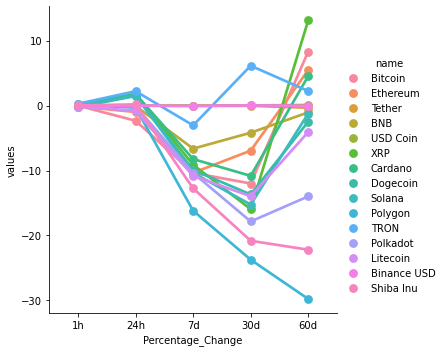

In [154]:
sns.catplot(data = df_final, x='Percentage_Change',y ='values',hue= 'name', kind = 'point')

In [155]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19371375.00000,19371375.00000,False,NaN,1,NaN,NaN,None,2023-05-12T18:52:00.000Z,26334.80870,16846998405.66206,-6.65500,0.04257,-2.36650,-10.31565,-11.91654,8.42221,21.54951,510141454828.47974,46.17880,553030982643.09998,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
1,1027,Ethereum,ETH,ethereum,6866,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122802175.98188,122802175.98188,True,NaN,2,NaN,NaN,None,2023-05-12T18:52:00.000Z,1771.52759,7867940367.92596,-13.32110,-0.09140,-1.00926,-10.28034,-6.86776,5.55123,16.95006,217547443255.56607,19.69270,217547443255.57001,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
2,825,Tether,USDT,tether,53290,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82726510004.16016,86090638895.15488,True,NaN,3,NaN,NaN,None,2023-05-12T18:52:00.000Z,1.00058,25508297876.89556,-8.59030,0.03270,-0.01020,-0.01392,-0.01181,-0.27067,0.04494,82774507874.69035,7.49480,86140588631.21001,None,2023-05-12T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-12 18:53:47.129025+00:00,NaT
3,1839,BNB,BNB,bnb,1355,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155860209.48856,155860209.48856,False,NaN,4,NaN,NaN,None,2023-05-12T18:52:00.000Z,305.73039,471742236.93249,-5.73060,0.07560,-0.09594,-6.65955,-4.16356,-1.00050,-0.64435,47651202762.51097,4.31460,47651202762.51000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
4,3408,USD Coin,USDC,usd-coin,12378,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29957952806.54203,29957952806.54203,False,NaN,5,NaN,NaN,None,2023-05-12T18:52:00.000Z,1.00025,3792137797.23813,-8.94590,0.02745,0.02590,0.03740,0.04318,0.12998,0.01671,29965499391.18951,2.71320,29965499391.19000,None,2023-05-12T18:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-12 18:53:47.129025+00:00,NaT
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.42311,1099076078.76854,17.28480,-0.09372,1.75772,-9.16611,-15.93985,13.11868,11.05069,21933194767.46313,1.98590,42311182364.13000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
6,2010,Cardano,ADA,cardano,783,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34841766154.41300,35777697010.94400,False,NaN,7,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.36024,231257314.94129,-15.05570,0.29741,1.75186,-8.26618,-10.79765,4.59541,-0.33469,12551486598.79832,1.13650,16210914637.41000,None,2023-05-12T18:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-12 18:53:47.129025+00:00,NaT
7,74,Dogecoin,DOGE,dogecoin,704,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139318086383.70526,139318086383.70526,True,NaN,8,NaN,NaN,None,2023-05-12T18:52:00.000Z,0.07129,345213833.08846,8.89630,-0.18775,1.49877,-9.90672,-13.61001,-2.41640,

In [189]:
df_bitcoin = df[['name','quote.USD.price','quote.USD.last_updated']]
df_bitcoin = df_bitcoin.query("name == 'Bitcoin'")
df_bitcoin

,name,quote.USD.price,quote.USD.last_updated
0,Bitcoin,26334.80870,2023-05-12T18:52:00.000Z
0,Bitcoin,26323.28232,2023-05-12T18:53:00.000Z
0,Bitcoin,26323.28232,2023-05-12T18:53:00.000Z
0,Bitcoin,26316.21134,2023-05-12T18:55:00.000Z


In [190]:
df_bitcoin.duplicated()

0    False
0    False
0     True
0    False
dtype: bool

In [191]:
df_bitcoin = df_bitcoin.drop_duplicates(keep = 'last')

In [192]:
df_bitcoin.rename(columns = {'quote.USD.last_updated':'timestamp'},inplace = True )

C:\Users\owner\AppData\Local\Temp\ipykernel_20384\2562974689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin.rename(columns = {'quote.USD.last_updated':'timestamp'},inplace = True )


In [193]:
df_bitcoin 

,name,quote.USD.price,timestamp
0,Bitcoin,26334.80870,2023-05-12T18:52:00.000Z
0,Bitcoin,26323.28232,2023-05-12T18:53:00.000Z
0,Bitcoin,26316.21134,2023-05-12T18:55:00.000Z


In [196]:
type(df_bitcoin)

pandas.core.frame.DataFrame

In [199]:
df_bitcoin = df_bitcoin.reset_index()
df_bitcoin

,index,name,quote.USD.price,timestamp
0,0,Bitcoin,26334.80870,2023-05-12T18:52:00.000Z
1,0,Bitcoin,26323.28232,2023-05-12T18:53:00.000Z
2,0,Bitcoin,26316.21134,2023-05-12T18:55:00.000Z


In [202]:
df_bitcoin.drop(['index'],axis='columns')

,name,quote.USD.price,timestamp
0,Bitcoin,26334.80870,2023-05-12T18:52:00.000Z
1,Bitcoin,26323.28232,2023-05-12T18:53:00.000Z
2,Bitcoin,26316.21134,2023-05-12T18:55:00.000Z


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

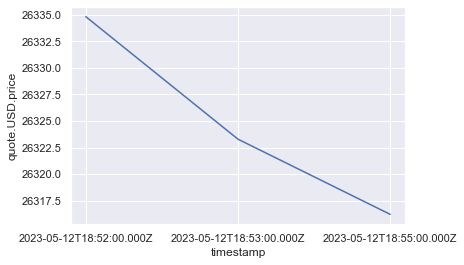

In [205]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x='timestamp',y='quote.USD.price',data = df_bitcoin )